In [1]:
%matplotlib inline
import string
import os
import matplotlib.pyplot as plt
import numpy as np
import sys
from PIL import Image
import six.moves.cPickle as pickle
from operator import itemgetter, attrgetter
ITER_TAG = "Iteration"
TST_TAG = 'Test'

In [2]:
def movingaverage(interval, window_size):
    window= np.ones(int(window_size))/float(window_size)
    return np.convolve(interval, window, 'same')

def draw(x, y, xlabel='Iterations', ylabel='', moving_average_window = 1, ylim=[], save=False, model="", sci=False):
    y_avg = movingaverage(y, moving_average_window)
    
    plt.rcParams['figure.figsize'] = (20.0, 16.0)
    if len(ylim)==2:
        plt.gca().set_ylim(ylim)
    else:
        plt.gca().set_ylim([min(y_avg), max(y_avg)])
    plt.gca().set_xlim([min(x), max(x)])
    plt.plot(x,y_avg)
    plt.xlabel(xlabel, fontsize=20)
    plt.ylabel(ylabel, fontsize=20)
    plt.tick_params(axis='both', which='major', labelsize=15)
    if sci:
        plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
    if save:
        plt.savefig("plot/"+model+"-"+ylabel+".pdf")
    plt.show()

In [7]:
#Log = '../jobs/VGGNet/okutama/flow/SSD_512x512/VGG_okutama_flow_SSD_512x512.log' # set log path
Log = '../jobs/VGGNet/okutama/SSD_512x512/log-final.log' # set log path
def find_loss(splt):
    splt = line.split(' ')
    ind = splt.index("=") + 1
    return float(splt[ind])

loss = []
error = []
base = 1000
it = 0
with open(Log,"r") as infile:
    for line in infile:
        splt = line.split(' ')
        if TST_TAG in splt:
            error.append( (it*base, find_loss(line)) )
            it+=1
        elif ITER_TAG in splt and "loss" in splt and (not "lr" in splt):
            ind = splt.index(ITER_TAG)
            itr_string = splt[ind+1]
            if itr_string[-1] != ",":
                print "Something is Wrong", line
                break
            itr = int(itr_string[:-1])
            loss.append( (itr, find_loss(line) ) )


In [8]:
print loss


[(4000, 3.26284), (4010, 3.33115), (4020, 3.19236), (4030, 3.00107), (4040, 2.81239), (4050, 2.80795), (4060, 2.69835), (4070, 3.12681), (4080, 3.16096), (4090, 2.95767), (4100, 2.87905), (4110, 2.84135), (4120, 3.30495), (4130, 3.10506), (4140, 2.85381), (4150, 3.04137), (4160, 3.01568), (4170, 2.93503), (4180, 2.69286), (4190, 2.67284), (4200, 2.54722), (4210, 2.5955), (4220, 2.50393), (4230, 2.36734), (4240, 3.35422), (4250, 3.25758), (4260, 3.08324), (4270, 3.04775), (4280, 3.08193), (4290, 3.03932), (4300, 2.71397), (4310, 2.46398), (4320, 2.52794), (4330, 2.51358), (4340, 2.42901), (4350, 2.97198), (4360, 3.24036), (4370, 3.0813), (4380, 2.90596), (4390, 2.89073), (4400, 2.82148), (4410, 3.02053), (4420, 3.31746), (4430, 3.13387), (4440, 2.82224), (4450, 3.05822), (4460, 2.91462), (4470, 2.78303), (4480, 2.69746), (4490, 2.60339), (4500, 2.91676), (4510, 3.0867), (4500, 3.70598), (4510, 3.36321), (4520, 2.91903), (4530, 2.80209), (4540, 2.70052), (4550, 2.5644), (4560, 2.67156), 

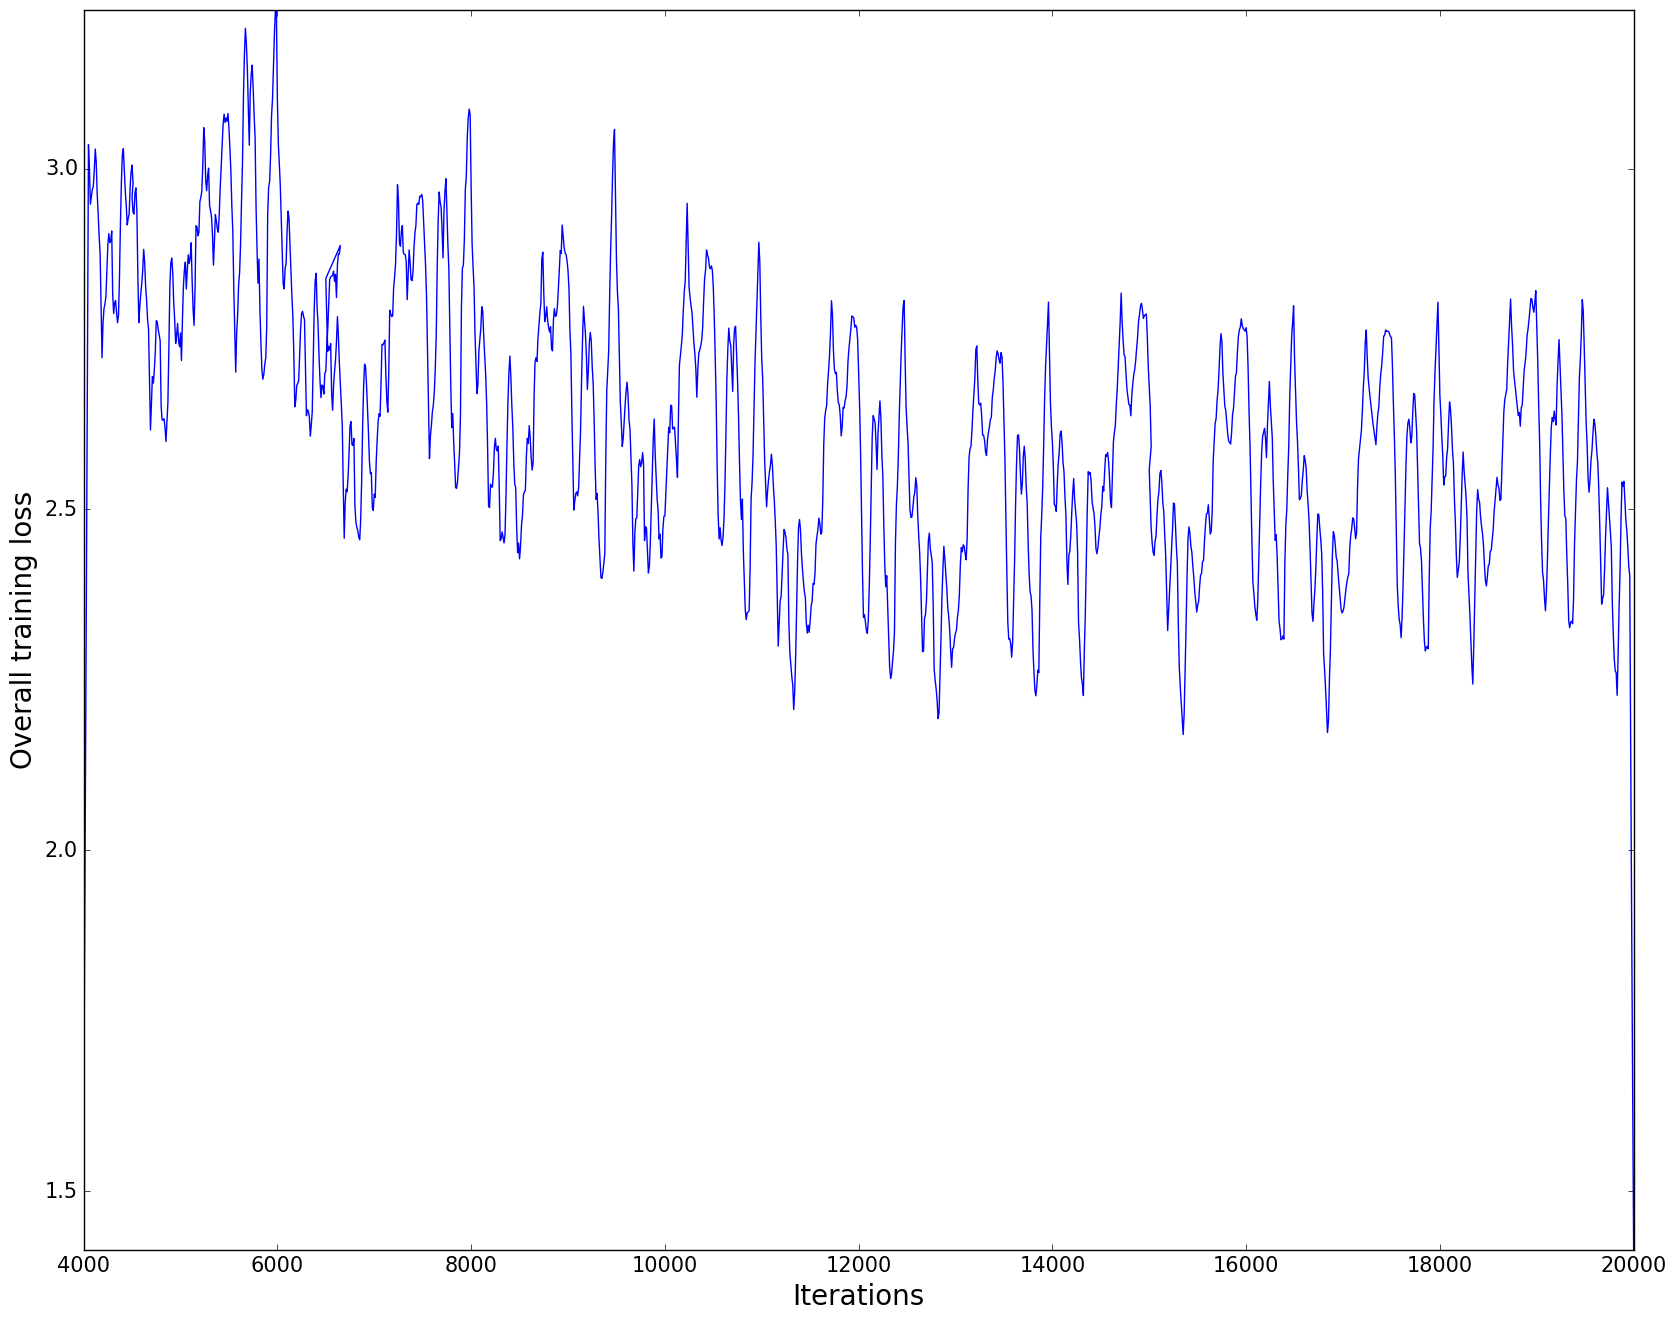

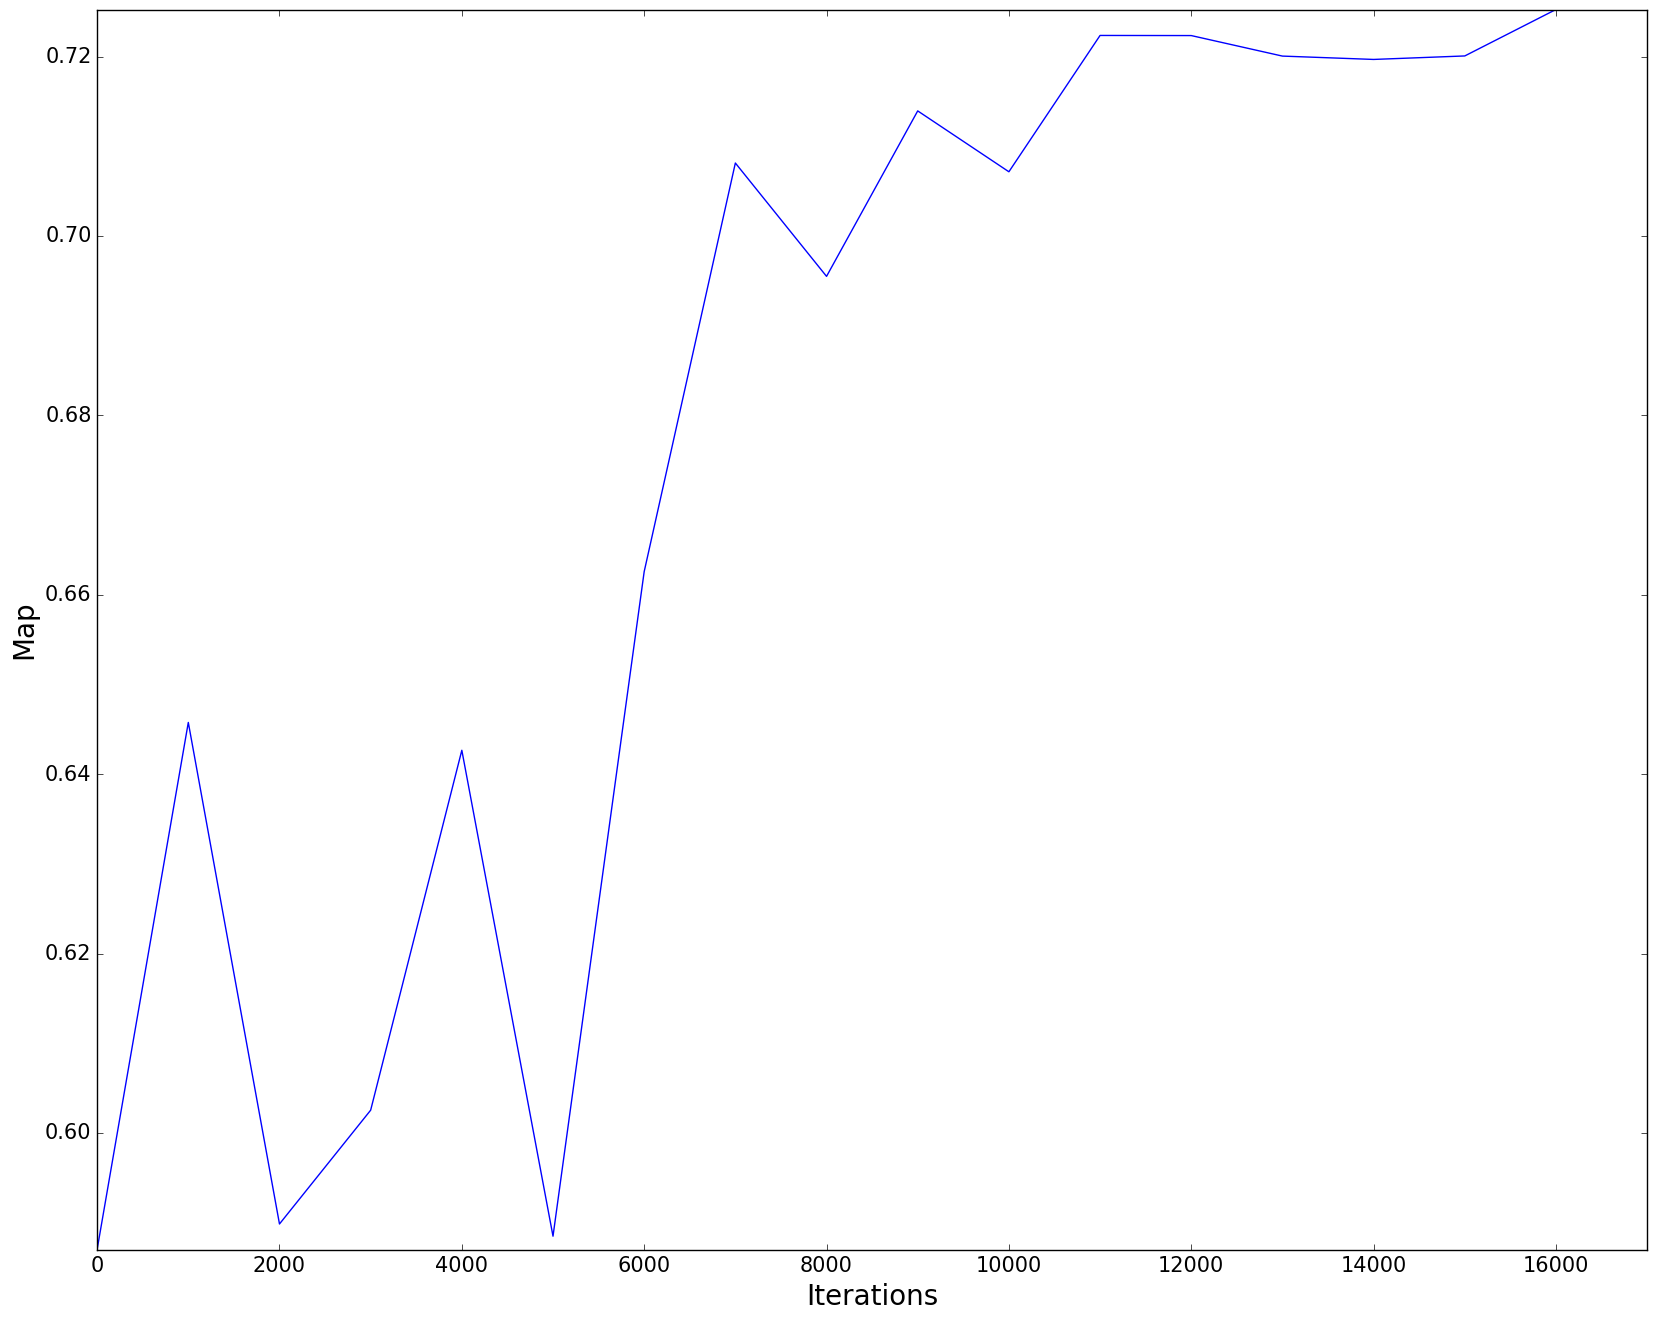

In [10]:
draw(*zip(*loss), ylabel="Overall training loss", moving_average_window =10, save=False,  model="VGG_512x512")
draw(*zip(*error), ylabel="Map", save=False,  model="VGG_512x512")